In [184]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

data = pd.read_csv("eurusd_hour.csv")
data['Date and Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format="%Y-%m-%d %H:%M")
data['bottom'] = data[["BO", "BC"]].min(axis=1)
data['height'] = abs(data["BO"] - data["BC"])
data['total_height'] = abs(data["BH"] - data["BL"])

data['isUp'] = True
data.loc[data['BO'] >= data['BC'], 'isUp'] = False

print(data.columns)
data.head(5)

Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh', 'Date and Time', 'bottom', 'height', 'total_height', 'isUp'],
      dtype='object')


,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh,Date and Time,bottom,height,total_height,isUp
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008,2005-05-02 00:00:00,1.2844,0.0008,0.0012,False
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002,2005-05-02 01:00:00,1.2842,0.0002,0.0009,False
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008,2005-05-02 02:00:00,1.2843,0.0008,0.0013,True
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000,2005-05-02 03:00:00,1.2851,0.0000,0.0009,False
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003,2005-05-02 04:00:00,1.2852,0.0003,0.0010,True


In [148]:
size = 1000

price = data.iloc[0:size]['BO']
time = data.iloc[0:size]['Time']
date = data.iloc[0:size]['Date']
date_time = data.iloc[0:size]['Date and Time']
bottom_price = data.iloc[0:size]['bottom']

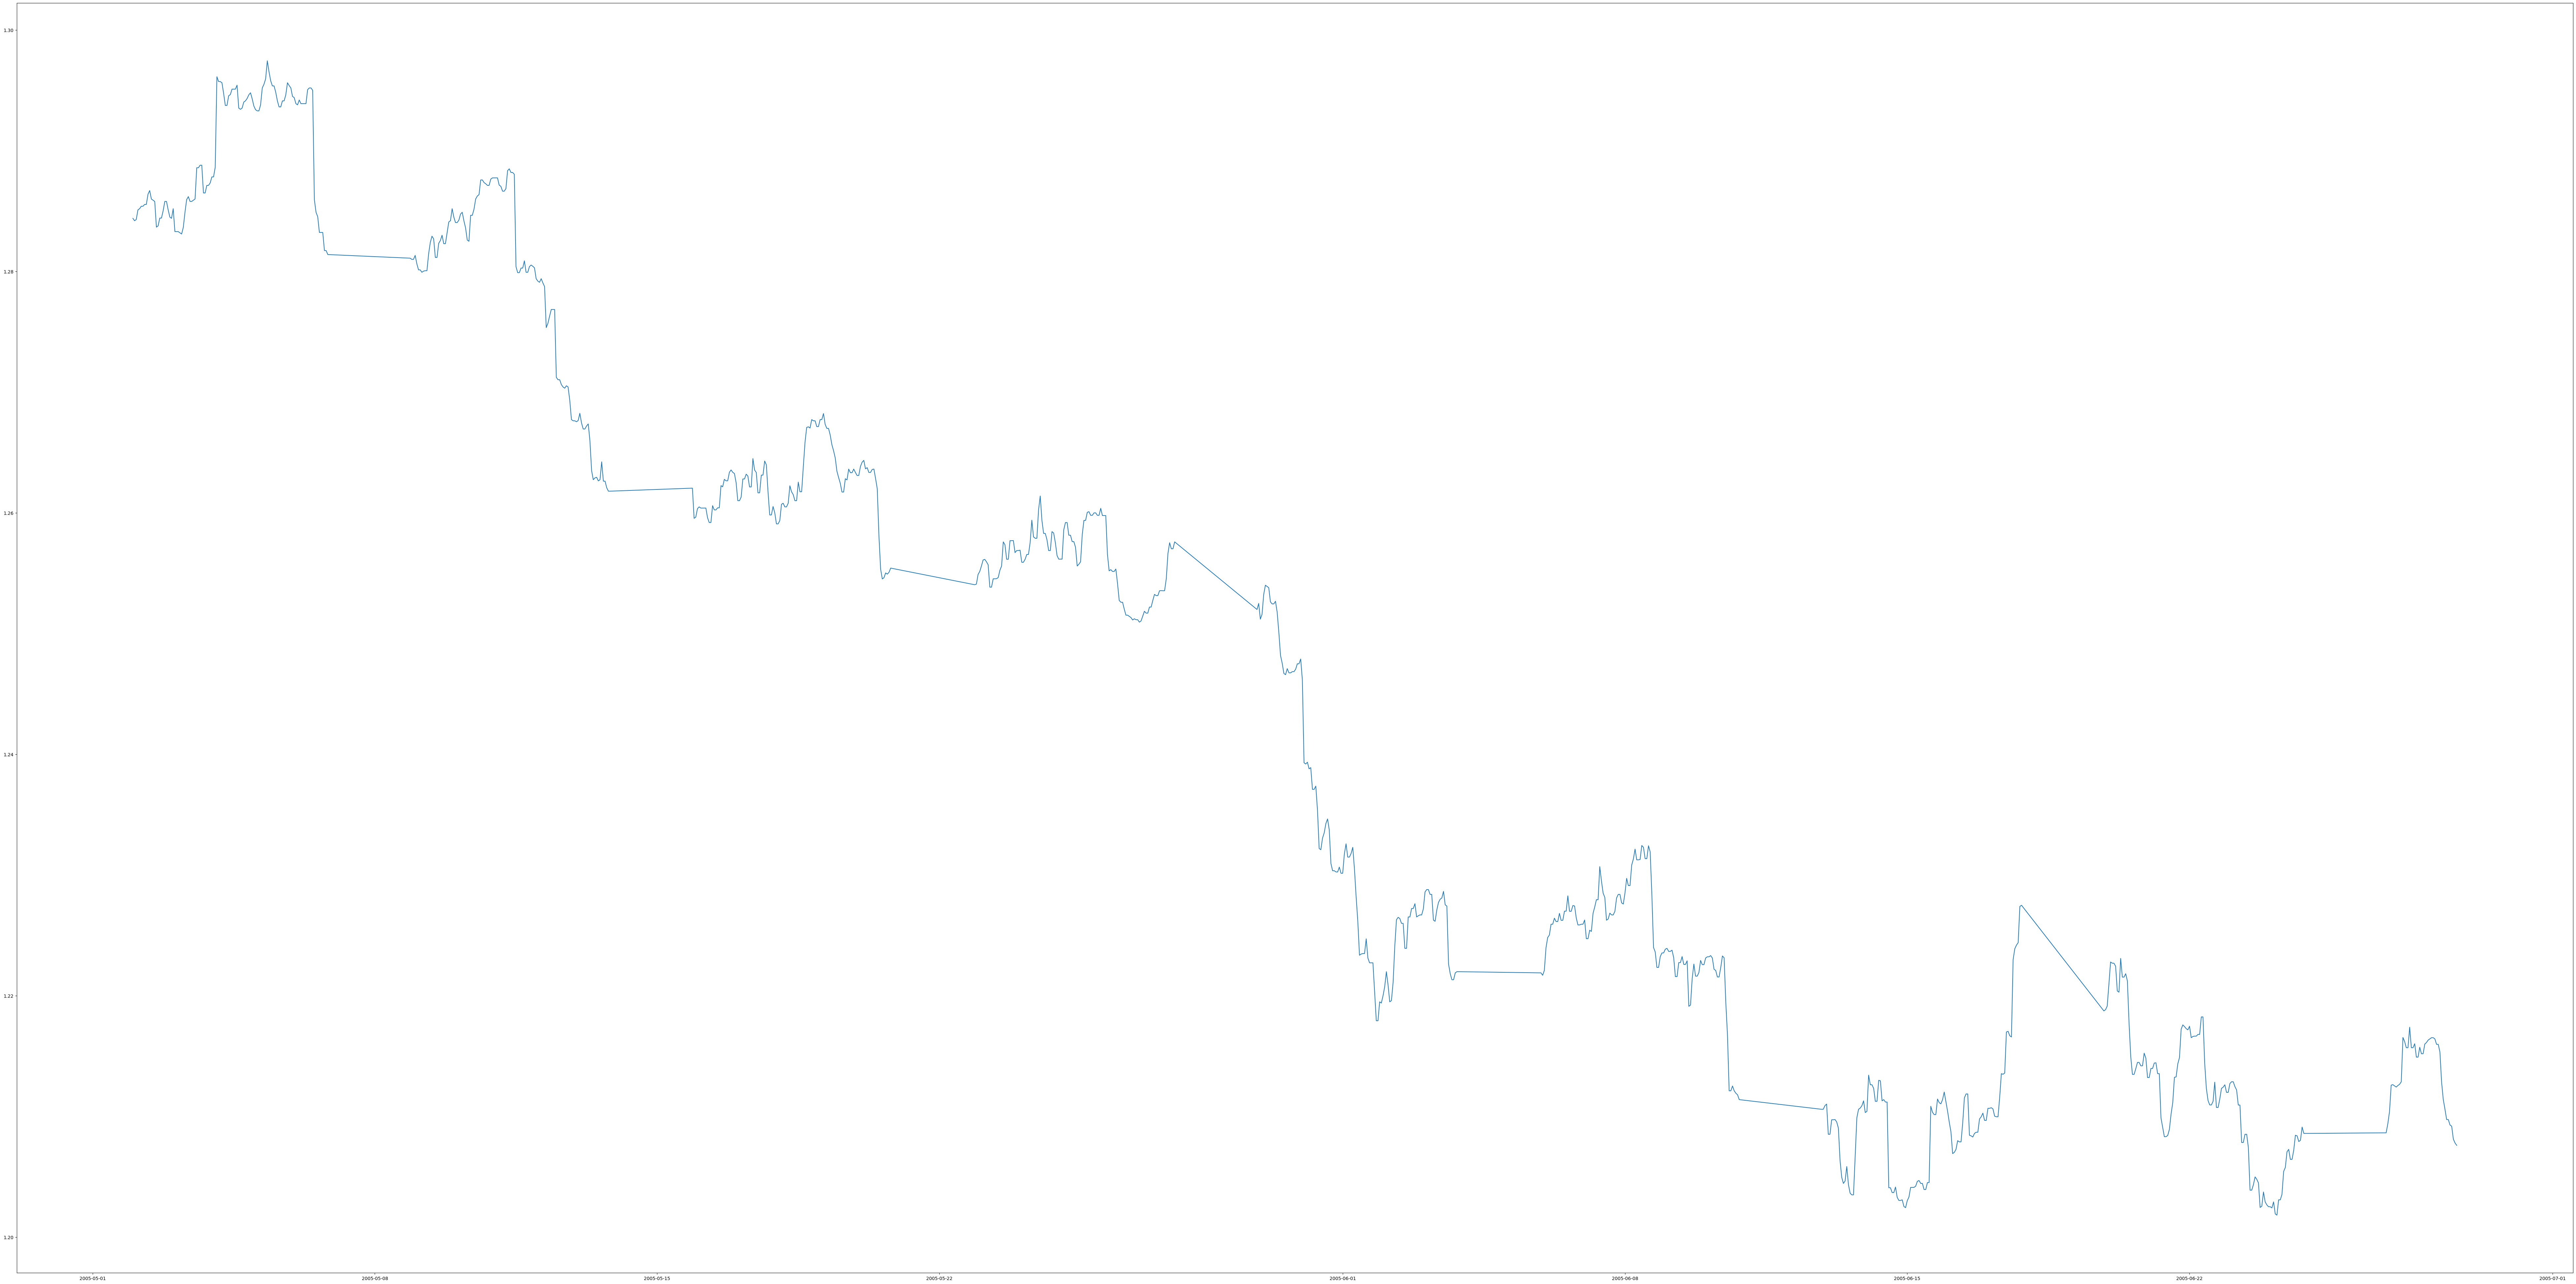

In [149]:
plt.plot(date_time, bottom_price)
plt.show()


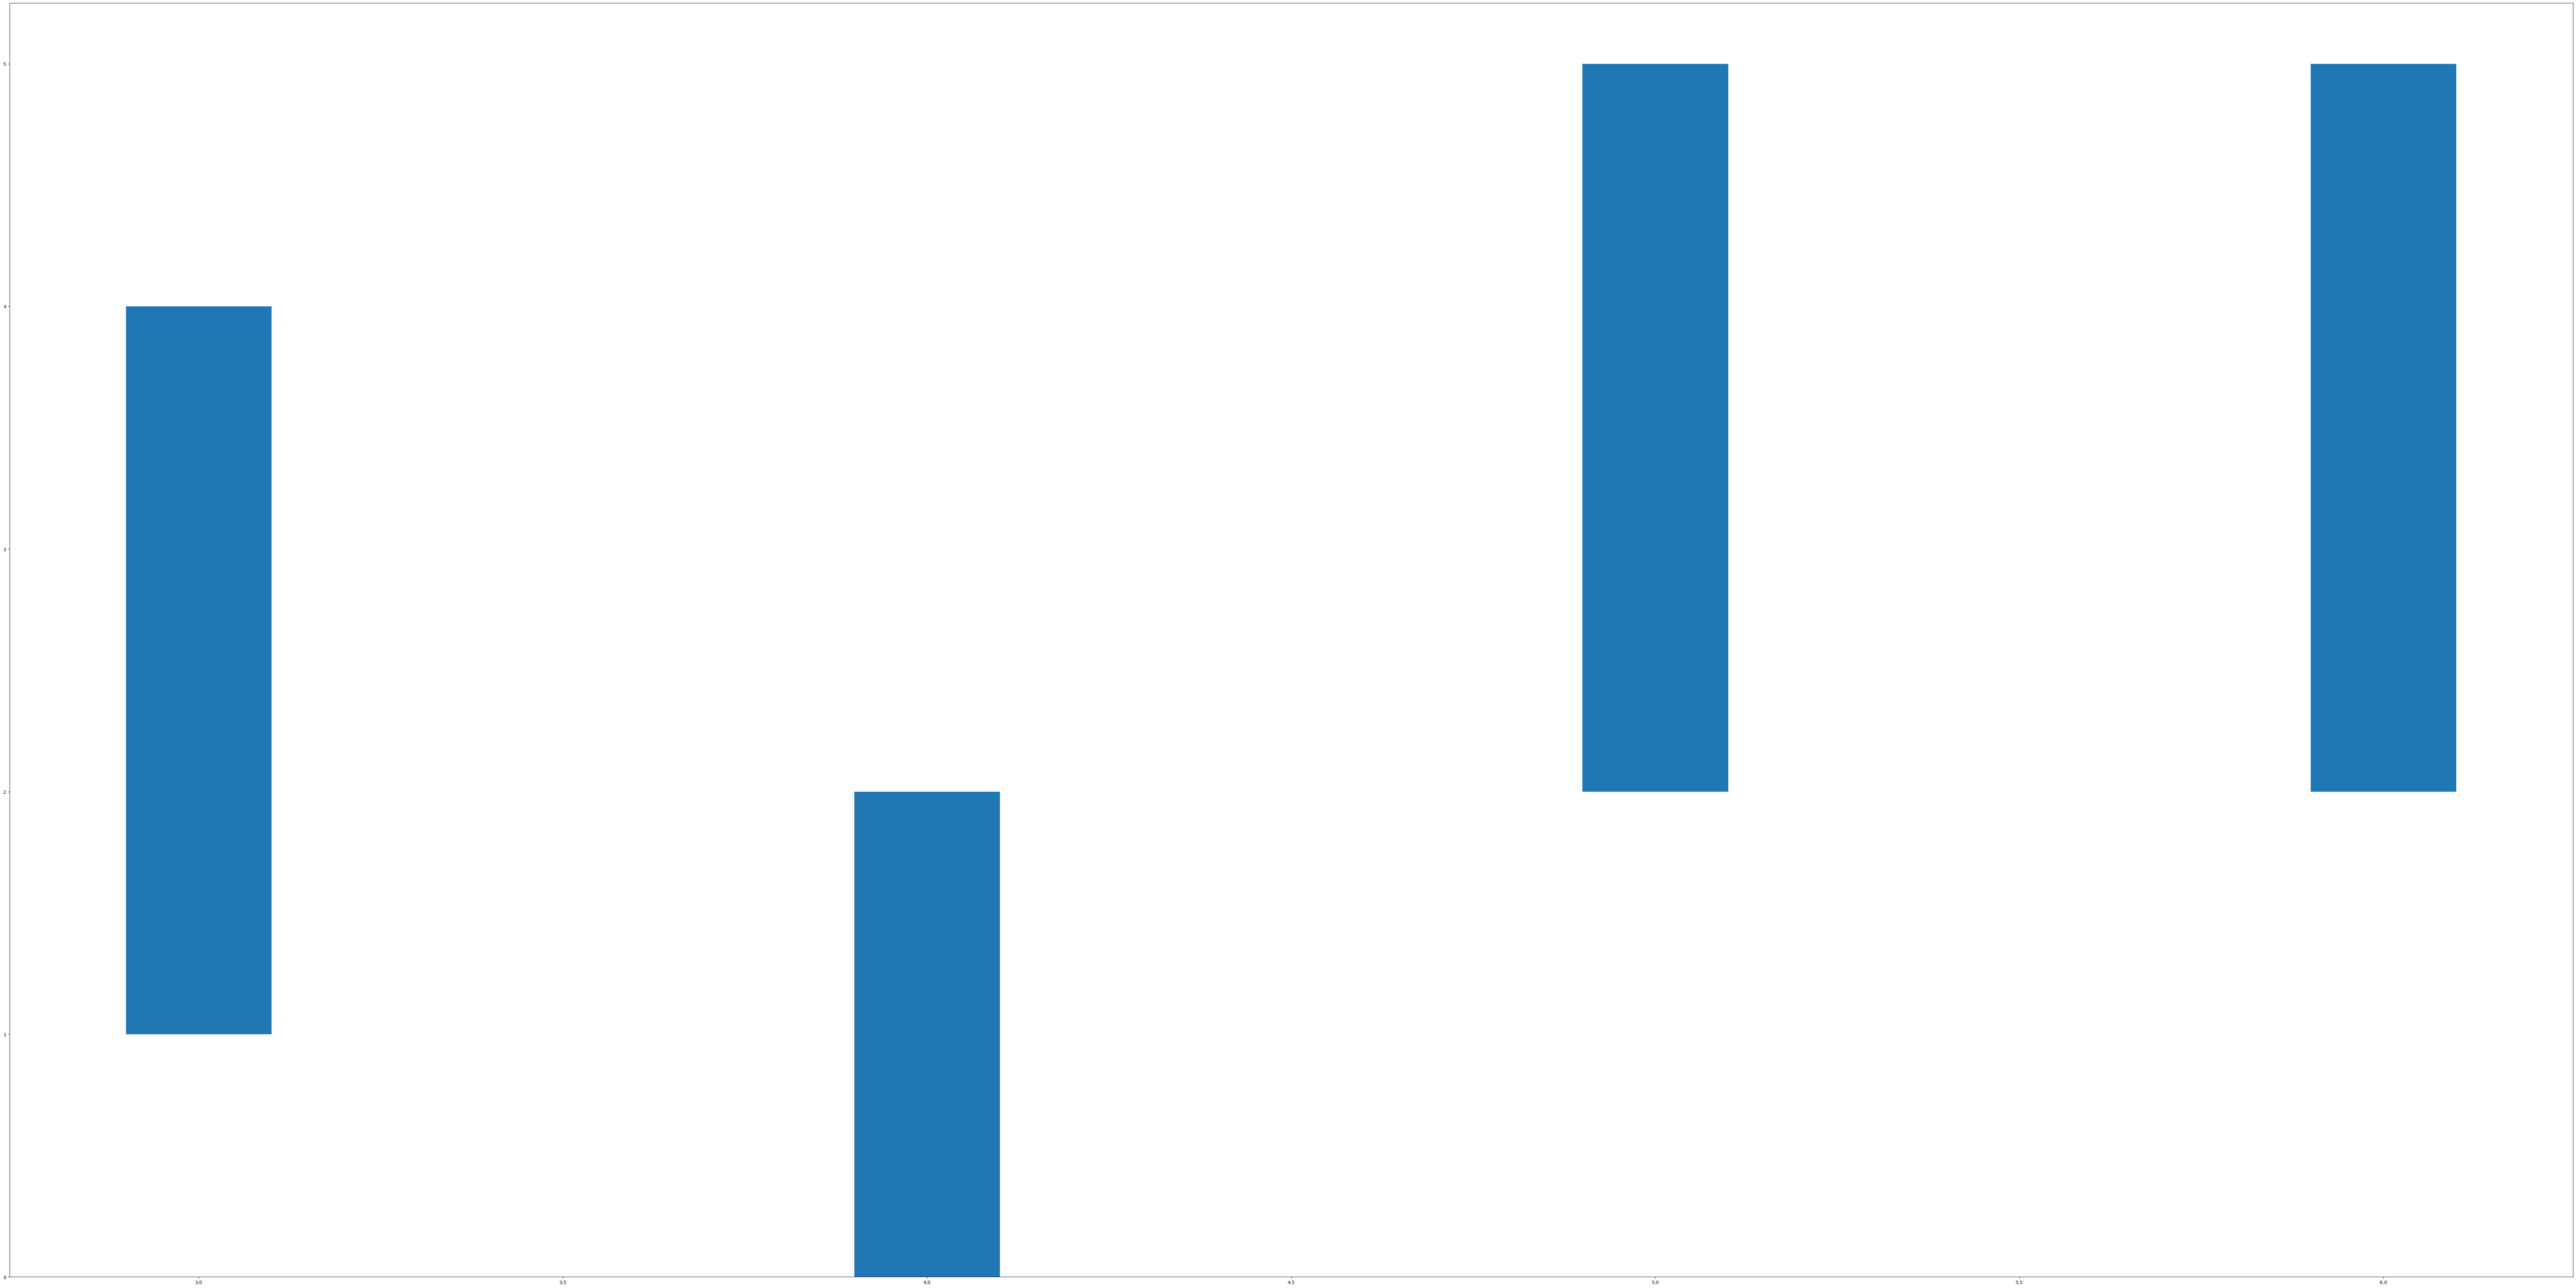

In [150]:
x= [3,4,5,6]
height= [3,2,3,3]
bottom = [1,0,2,2]
plt.bar(x, height, width=0.2, bottom=bottom)
plt.show()

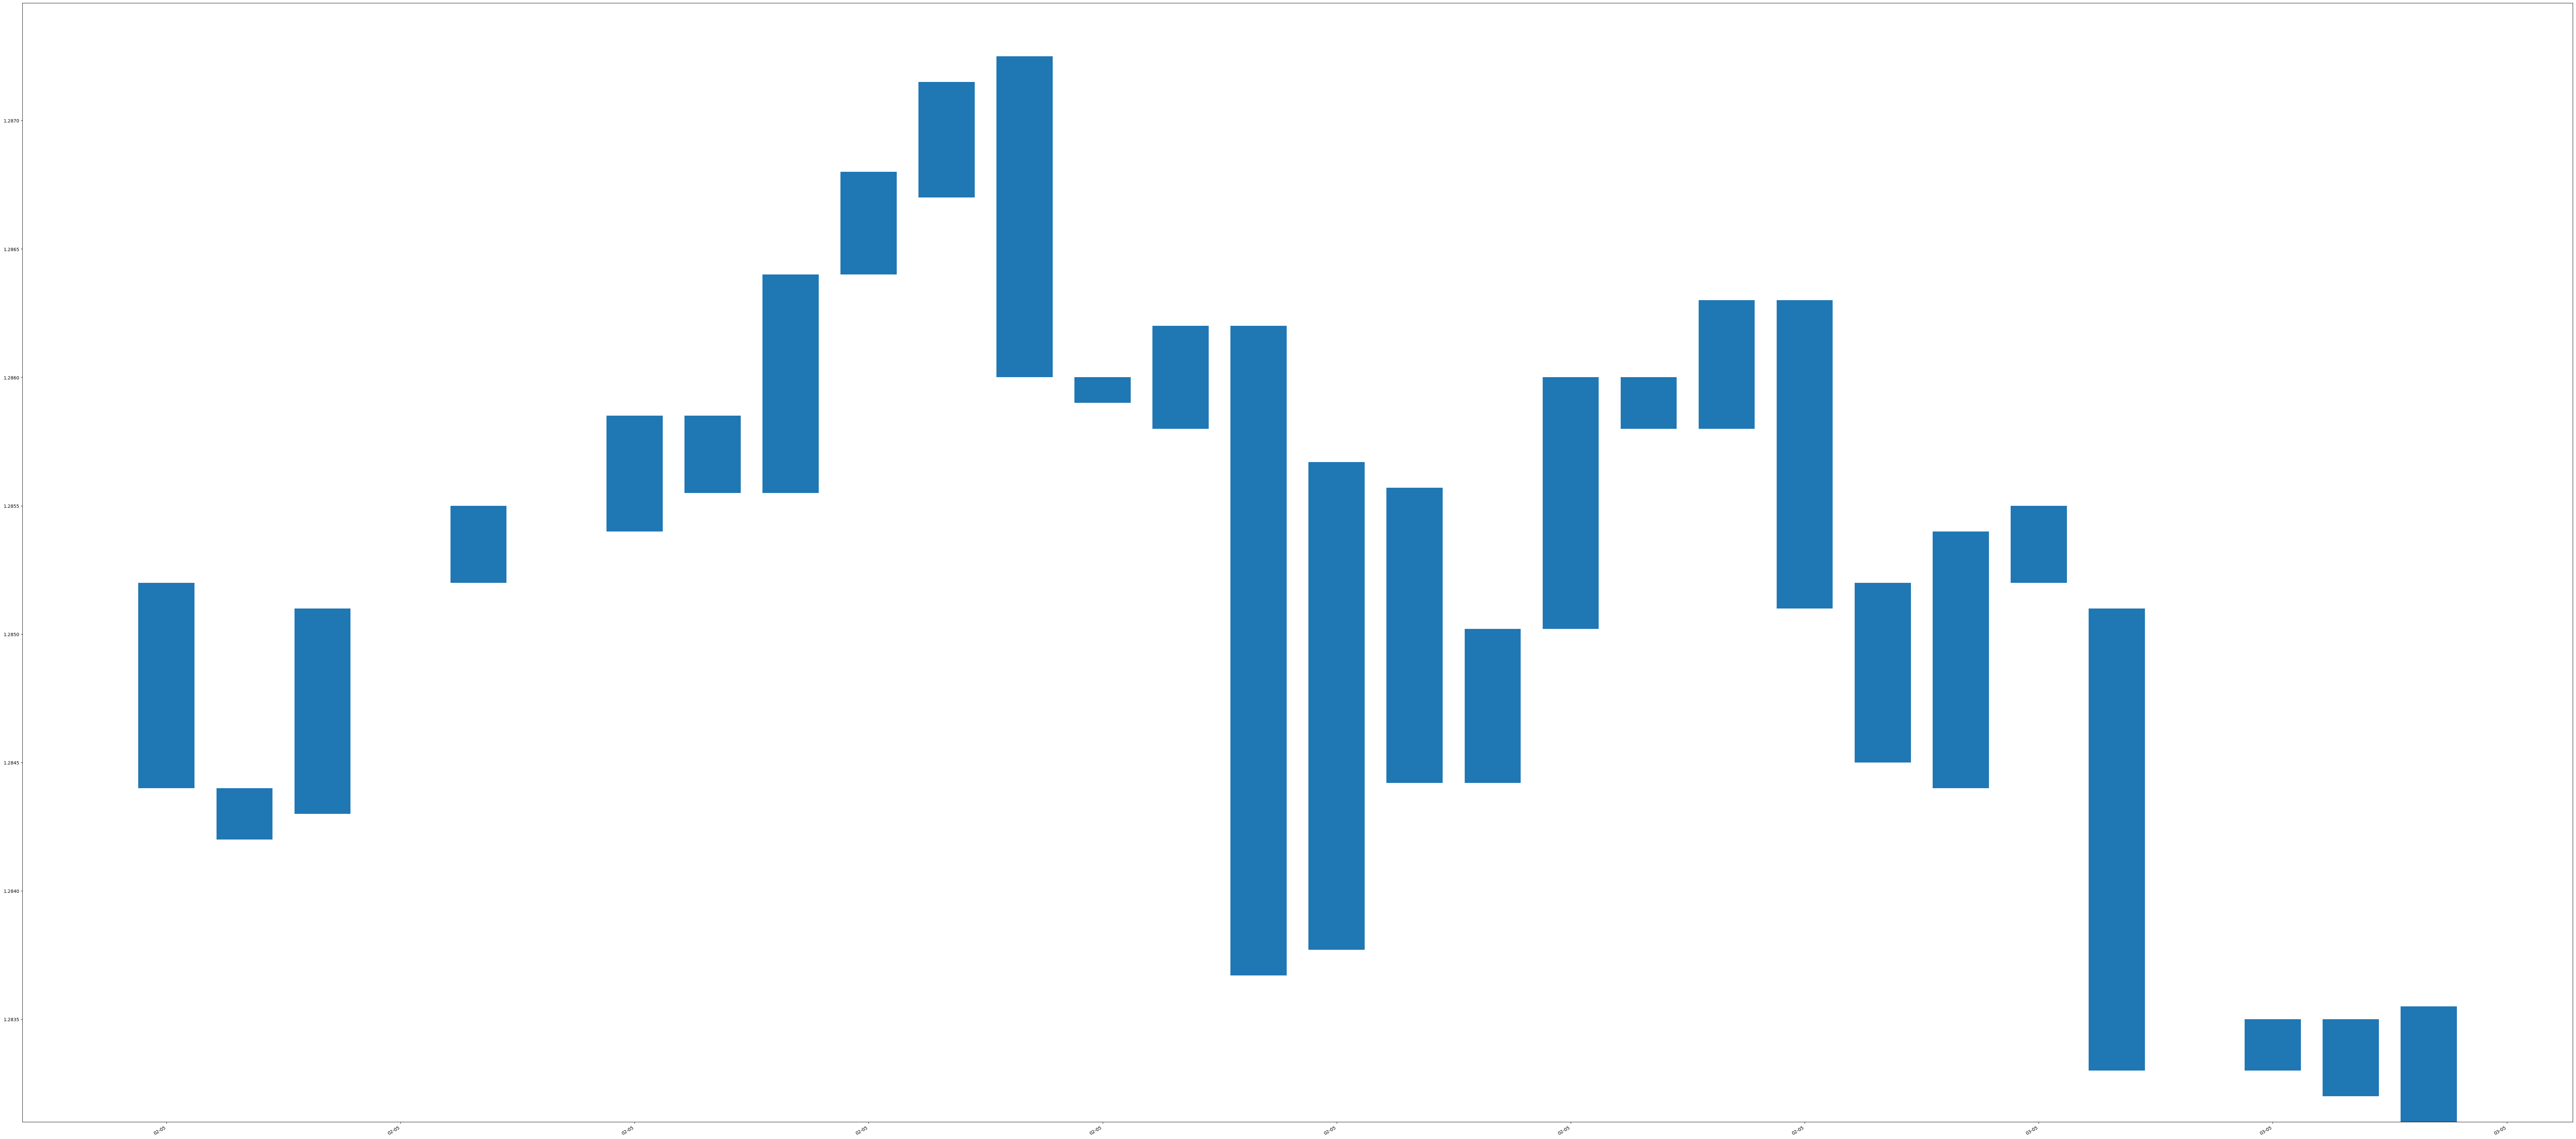

In [151]:
size = 30

open_price = data.iloc[0:size]['BO']
close_price = data.iloc[0:size]['BC']
height = abs(close_price-open_price)
time = data.iloc[0:size]['Date and Time']
bottom = data.iloc[0:size]['bottom']
data

fig, ax = plt.subplots()
ax.bar(time, height, width=0.03, bottom=bottom)

formatDate = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatDate)

fig.autofmt_xdate()
plt.show()


## Ploting Values


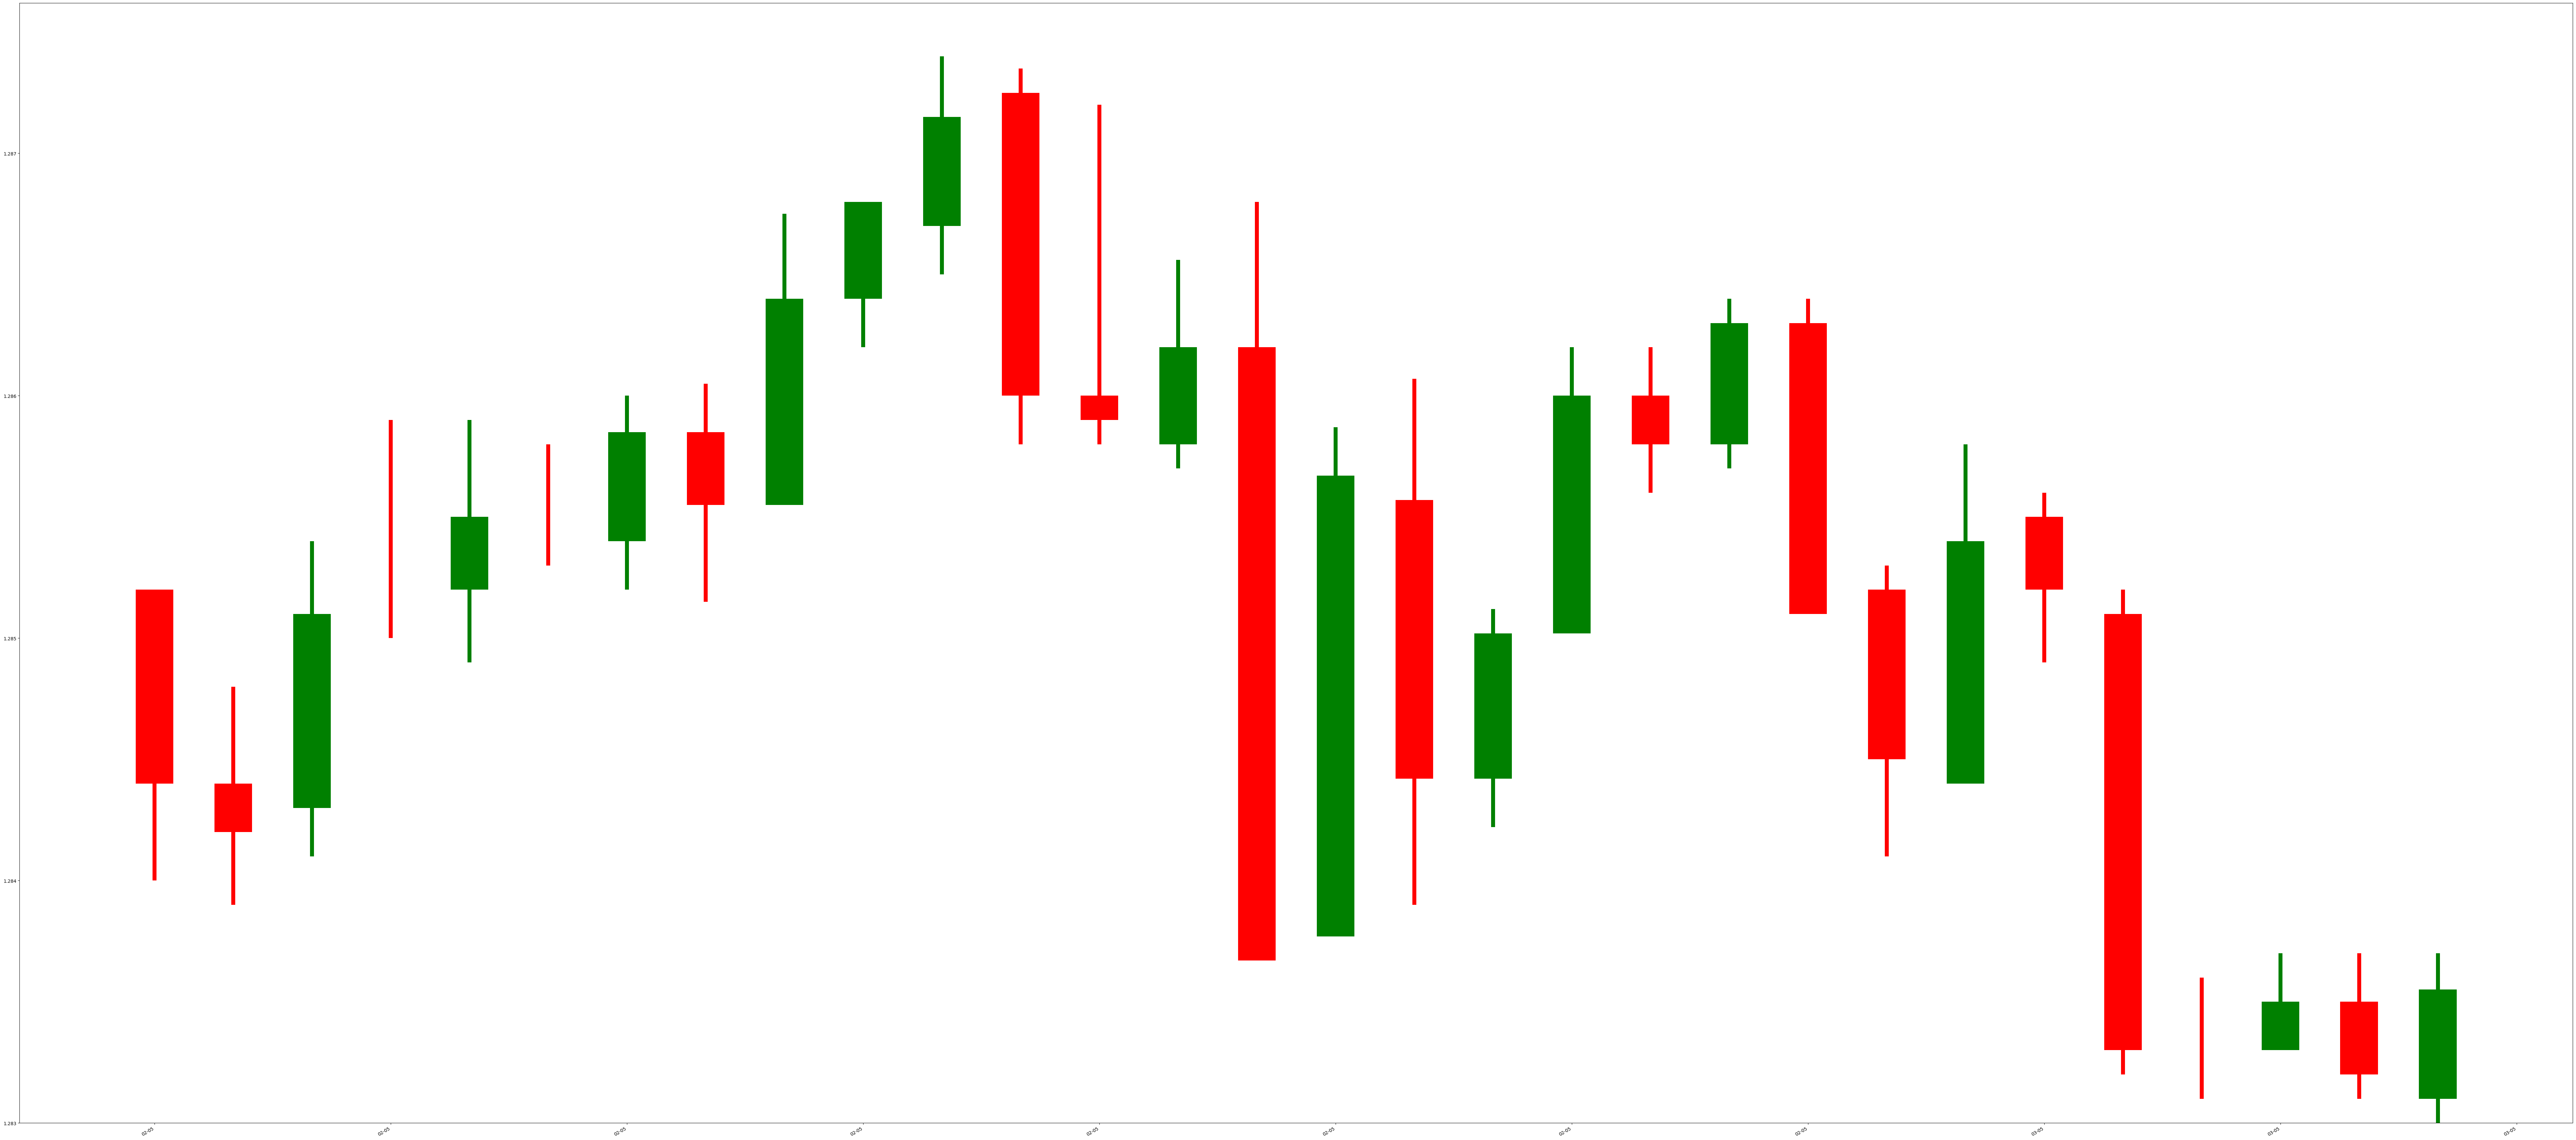

In [257]:
size = 30
width= 0.02
width_narrow= 0.002
data_frame = data.iloc[0:size]

#Variables
up_price_bottom = data_frame.loc[data_frame['isUp']][['BO','BL', 'height', 'Date and Time', 'total_height']]
down_price_bottom = data_frame.loc[~data_frame['isUp']][['BC', 'BL', 'height', 'Date and Time', 'total_height']]


#Plot
fig, ax = plt.subplots()
ax.bar(up_price_bottom['Date and Time'], up_price_bottom['height'], width=width, bottom=up_price_bottom['BO'], color='green')
ax.bar(up_price_bottom['Date and Time'], up_price_bottom['total_height'], width=width_narrow, bottom=up_price_bottom['BL'], color='green')
ax.bar(down_price_bottom['Date and Time'], down_price_bottom['height'], width=width, bottom=down_price_bottom['BC'], color='red')
ax.bar(down_price_bottom['Date and Time'], down_price_bottom['total_height'], width=width_narrow, bottom=down_price_bottom['BL'], color='red')

formatDate = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatDate)

fig.autofmt_xdate()
plt.show()

In [258]:
def plot_bar_chat(data):
    #Variables
    up_price_bottom = data.loc[data['isUp']][['BO','BL', 'height', 'Date and Time', 'total_height']]
    down_price_bottom = data.loc[~data['isUp']][['BC', 'BL', 'height', 'Date and Time', 'total_height']]
    
    #Plot
    fig, ax = plt.subplots()
    ax.bar(up_price_bottom['Date and Time'], up_price_bottom['height'], width=width, bottom=up_price_bottom['BO'], color='green')
    ax.bar(up_price_bottom['Date and Time'], up_price_bottom['total_height'], width=width_narrow, bottom=up_price_bottom['BL'], color='green')
    ax.bar(down_price_bottom['Date and Time'], down_price_bottom['height'], width=width, bottom=down_price_bottom['BC'], color='red')
    ax.bar(down_price_bottom['Date and Time'], down_price_bottom['total_height'], width=width_narrow, bottom=down_price_bottom['BL'], color='red')
    
    formatDate = DateFormatter("%d-%m")
    ax.xaxis.set_major_formatter(formatDate)
    
    fig.autofmt_xdate()
    plt.show()

## Imbalance Detector

To check if there is an imbalance:
for each 3 consecutive candles, a,b,c:
we need 3 consectuvie colors

If color = green :
- take the highest price of a
- check the lowest price of c
- if highest a < lowest c -> imbalance
  
If color = red:
- take the lowest price of a
- check the highest price of c
- if lowest a > highest c -> imbalance

In [265]:
def check_imbalance(data, index):
    if data.iloc[index, data_frame.columns.get_loc("isUp")]:
        high = data.iloc[index, data_frame.columns.get_loc("BH")]
        low = data.iloc[index+2, data_frame.columns.get_loc("BL")]
        if high < low:
            return True
    else:
        high = data.iloc[index+2, data_frame.columns.get_loc("BH")]
        low = data.iloc[index, data_frame.columns.get_loc("BL")]
        if low > high:
            return True
    return False

In [295]:
size_1 = 2060
size_2 = 2100
size = size_2 - size_1

data_frame = data.iloc[size_1:size_2]
data_frame = data_frame.reset_index(drop=True)
data_imbalance =[]

for index, row in data_frame.iterrows():
    first_color = row['isUp']
    if index<size-1:
        second_color = data_frame.iloc[index+1, data_frame.columns.get_loc("isUp")]
        if  second_color == first_color:
            if index<size-2 and data_frame.iloc[index+2, data_frame.columns.get_loc("isUp")] == first_color:
                #Three consecutive values
                if check_imbalance(data_frame, index):
                    data_imbalance.append(data_frame.iloc[index:index+3])



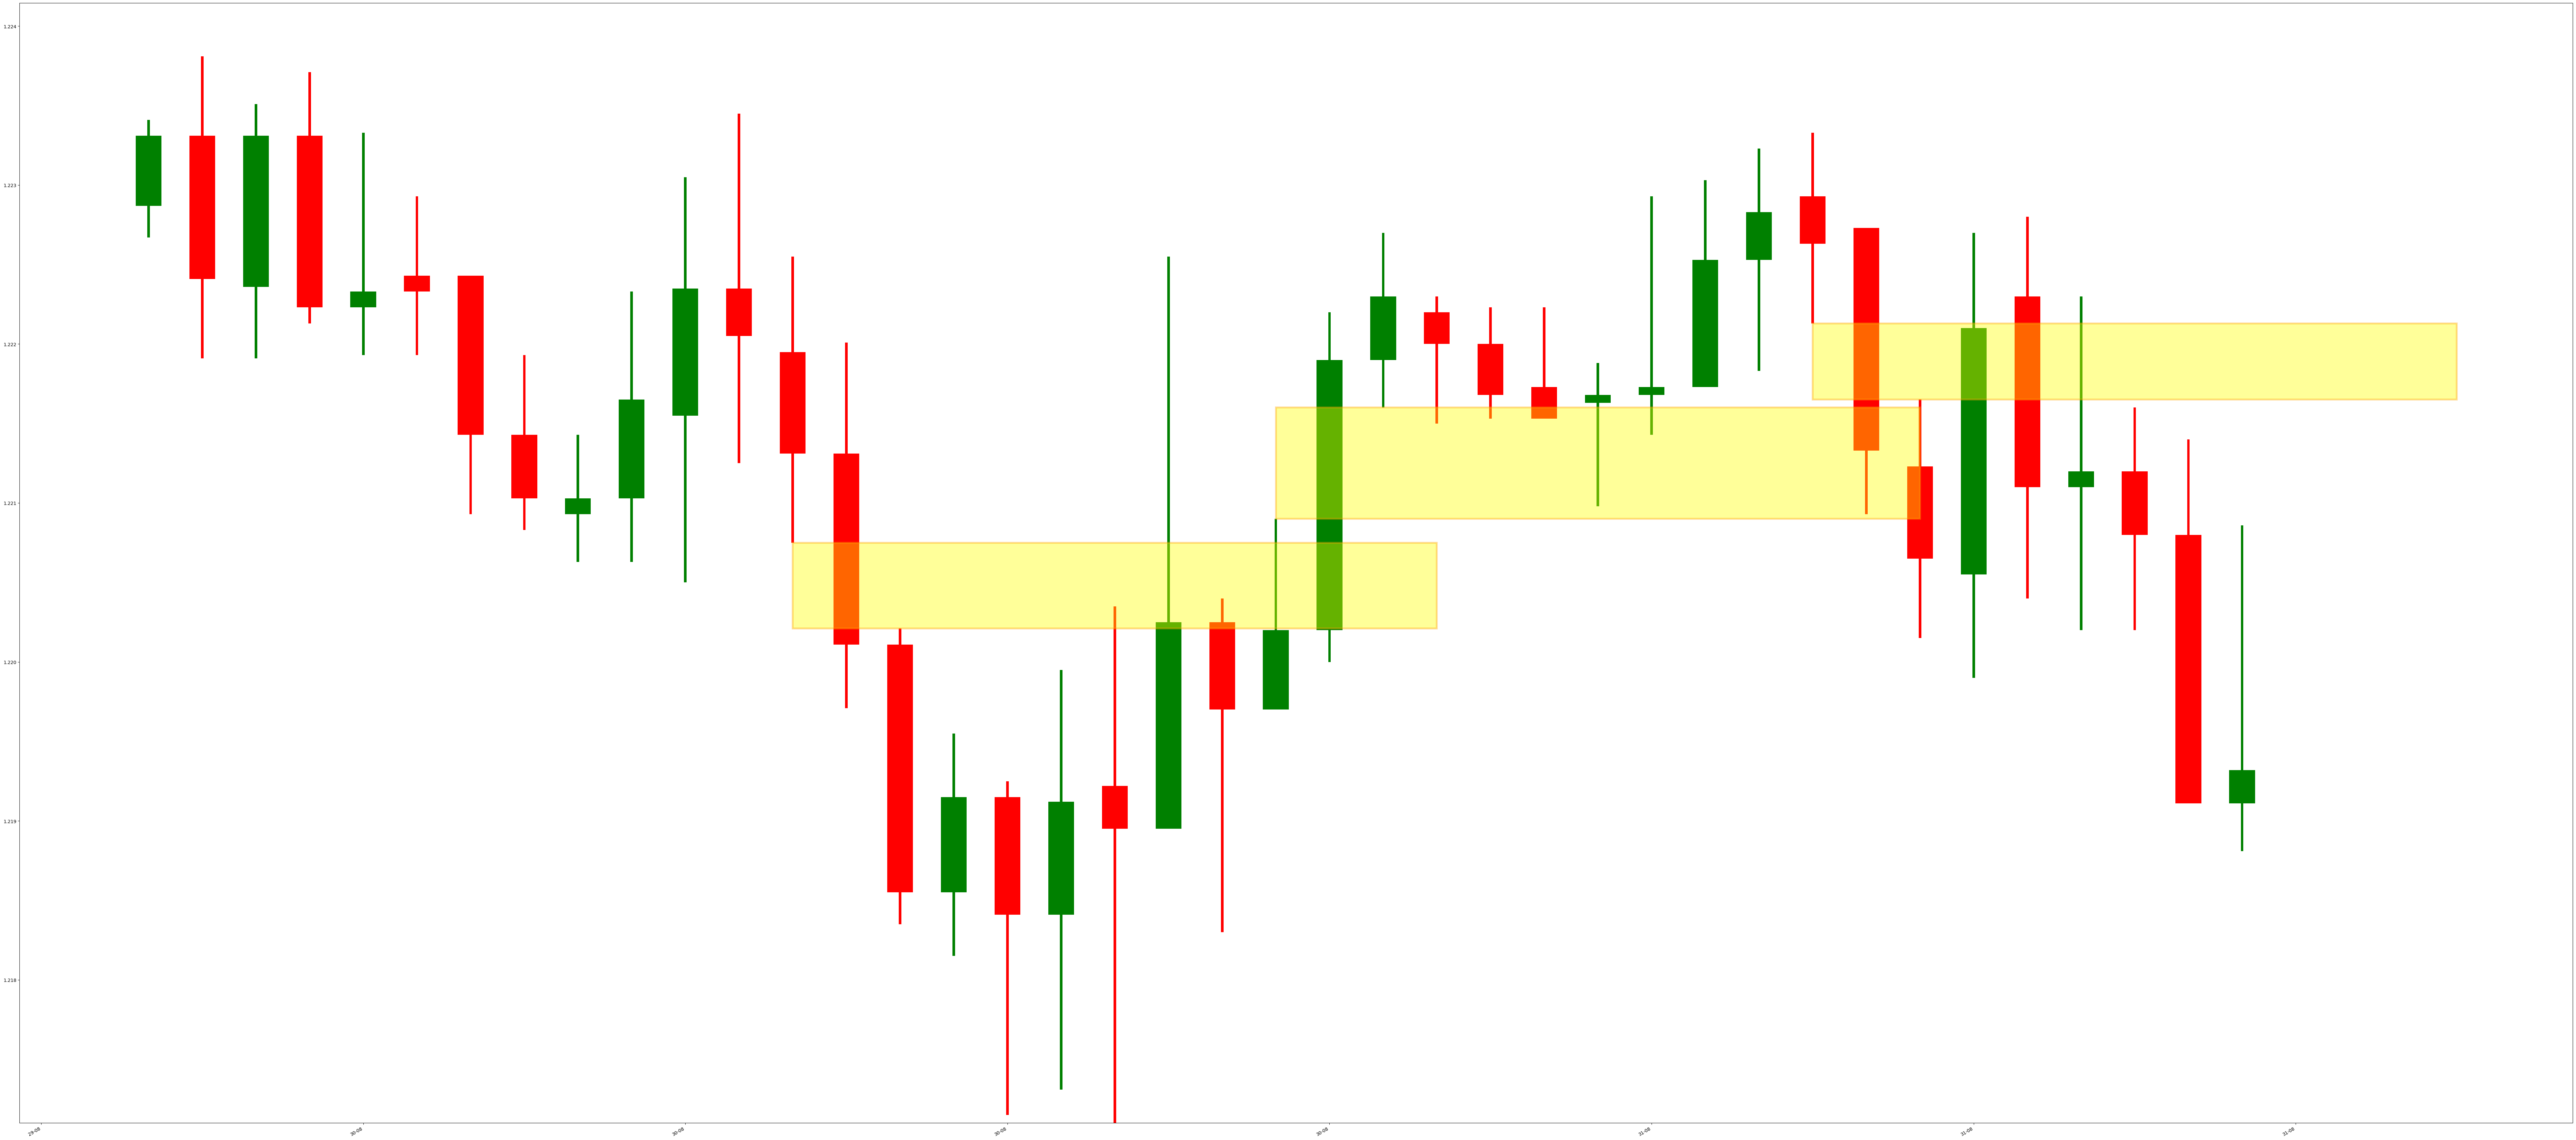

In [296]:
plt.rcParams['figure.figsize'] = [100, 50]

width= 0.02
width_narrow= 0.002
#Variables
up_price_bottom = data_frame.loc[data_frame['isUp']][['BO','BL', 'height', 'Date and Time', 'total_height']]
down_price_bottom = data_frame.loc[~data_frame['isUp']][['BC', 'BL', 'height', 'Date and Time', 'total_height']]

#Plot barchart
fig, ax = plt.subplots()
ax.bar(mdates.date2num(up_price_bottom['Date and Time']), up_price_bottom['height'], width=width, bottom=up_price_bottom['BO'], color='green')
ax.bar(mdates.date2num(up_price_bottom['Date and Time']), up_price_bottom['total_height'], width=width_narrow, bottom=up_price_bottom['BL'], color='green')
ax.bar(mdates.date2num(down_price_bottom['Date and Time']), down_price_bottom['height'], width=width, bottom=down_price_bottom['BC'], color='red')
ax.bar(mdates.date2num(down_price_bottom['Date and Time']), down_price_bottom['total_height'], width=width_narrow, bottom=down_price_bottom['BL'], color='red')

#Plot Imbalance rectangle
for imbalance in data_imbalance:
    imbalance = imbalance.reset_index(drop = True)
    if imbalance.iloc[0]['isUp']:
        x_rec = imbalance.loc[0]['Date and Time']
        y_rec = imbalance.loc[0]['BH']
        rec_height = imbalance.loc[2]['BL']-imbalance.loc[0]['BH']
    else:
        x_rec = imbalance.loc[0]['Date and Time']
        y_rec = imbalance.loc[2]['BH']
        rec_height = imbalance.loc[0]['BL']-imbalance.loc[2]['BH']
    start = mdates.date2num(x_rec)
    end = mdates.date2num(x_rec)
    rec_width = 0.5
    ax.add_patch(Rectangle((mdates.date2num(x_rec), y_rec), rec_width, rec_height,facecolor='yellow', alpha=0.4,edgecolor='orange',linewidth=4))

#formatDate = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatDate)
fig.autofmt_xdate()
plt.show()